# IMPORT

In [151]:
import pandas as pd
import os

In [152]:
os. getcwd()

'C:\\Users\\Windows'

# DATASET

In [153]:
df = pd.read_csv(r'C:\Users\Windows\Downloads\train.csv')

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
train = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Survived']]
train.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


# Data VISUALIZATION

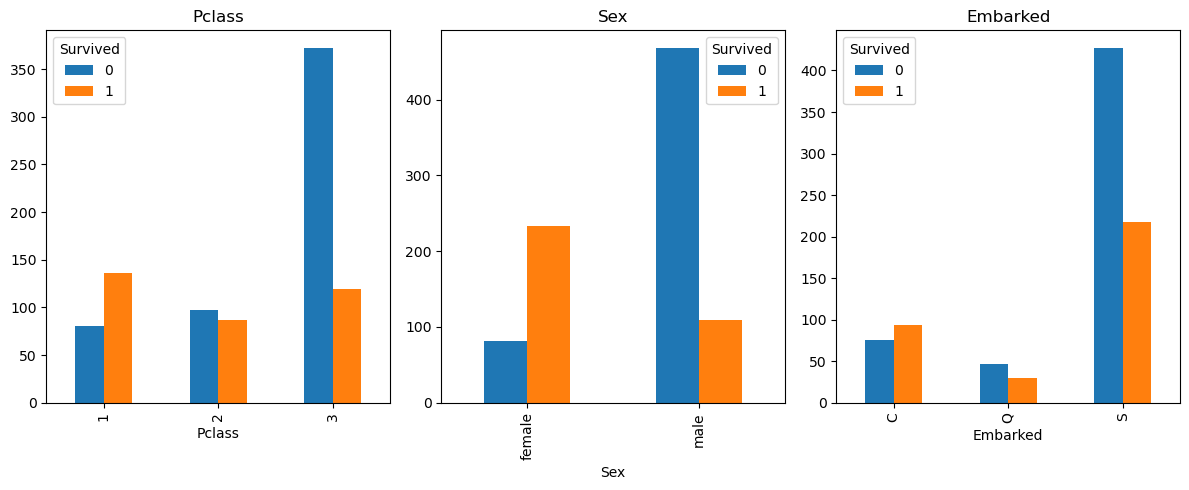

In [156]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

axes = axes.flatten()

columns = ['Pclass', 'Sex', 'Embarked']

for (i,ax) in enumerate (axes):
    if(i==5): break
    pd.crosstab(train[columns[i]], train['Survived']).plot(kind='bar', ax=axes[i])
    ax.set_title(columns[i])
    
plt.tight_layout()

Text(0, 0.5, 'Survived')

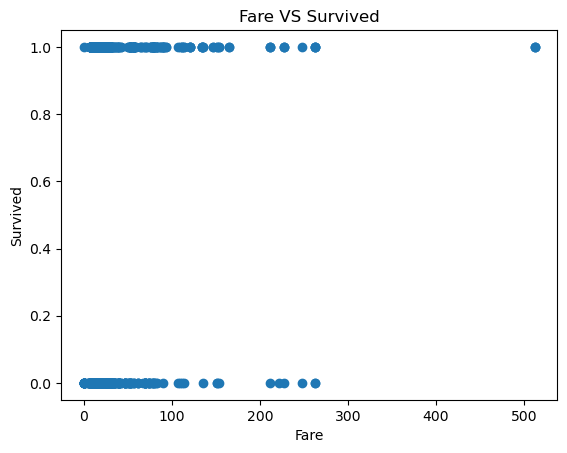

In [157]:
# plot a scatter plot
plt.scatter(x=train['Fare'], y=train['Survived'])
plt.title("Fare VS Survived")
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

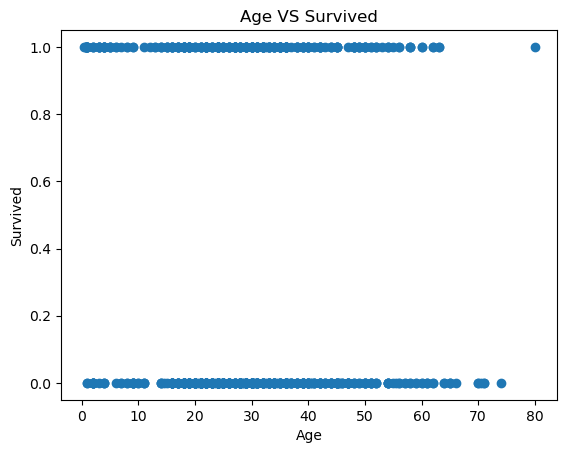

In [158]:
# plot a scatter plot
plt.scatter(x=train['Age'], y=train['Survived'])
plt.title("Age VS Survived")
plt.xlabel('Age')
plt.ylabel('Survived')

# PREPARE THE TRAINING DATASET

In [159]:
# check for any missing values
print("missing values in Pclass: ",train['Pclass'].isnull().sum())
print("missing values in Sex: ",train['Sex'].isnull().sum())
print("missing values in Age: ",train['Age'].isnull().sum())
print("missing values in Fare: ",train['Fare'].isnull().sum())
print("missing values in Embarked: ",train['Embarked'].isnull().sum())

missing values in Pclass:  0
missing values in Sex:  0
missing values in Age:  177
missing values in Fare:  0
missing values in Embarked:  2


In [160]:
train = train.dropna()

In [161]:
# check for any missing values
print("missing values in Pclass: ",train['Pclass'].isnull().sum())
print("missing values in Sex: ",train['Sex'].isnull().sum())
print("missing values in Age: ",train['Age'].isnull().sum())
print("missing values in Fare: ",train['Fare'].isnull().sum())
print("missing values in Embarked: ",train['Embarked'].isnull().sum())

missing values in Pclass:  0
missing values in Sex:  0
missing values in Age:  0
missing values in Fare:  0
missing values in Embarked:  0


###### One-hot encoding is used when there is not order among the data
###### label encoding is used when there is a order

In [162]:
from sklearn.preprocessing import LabelEncoder

le_Pclass = LabelEncoder()
le_embarked = LabelEncoder()

In [163]:
train['le_Pclass'] =  le_Pclass.fit_transform(train['Pclass'])
train['le_embarked'] = le_embarked.fit_transform(train['Embarked'])
train.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,le_Pclass,le_embarked
0,3,male,22.0,7.2500,S,0,2,2
1,1,female,38.0,71.2833,C,1,0,0
2,3,female,26.0,7.9250,S,1,2,2
3,1,female,35.0,53.1000,S,1,0,2
4,3,male,35.0,8.0500,S,0,2,2


In [164]:
train = train.drop(['Pclass', 'Embarked'], axis='columns')
train.head()

,Sex,Age,Fare,Survived,le_Pclass,le_embarked
0,male,22.0,7.2500,0,2,2
1,female,38.0,71.2833,1,0,0
2,female,26.0,7.9250,1,2,2
3,female,35.0,53.1000,1,0,2
4,male,35.0,8.0500,0,2,2


In [165]:
gender_dummies = pd.get_dummies(train['Sex'])
gender_dummies.head() 

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [166]:
new = pd.concat([train,gender_dummies], axis = 'columns')
new.head()

,Sex,Age,Fare,Survived,le_Pclass,le_embarked,female,male
0,male,22.0,7.2500,0,2,2,False,True
1,female,38.0,71.2833,1,0,0,True,False
2,female,26.0,7.9250,1,2,2,True,False
3,female,35.0,53.1000,1,0,2,True,False
4,male,35.0,8.0500,0,2,2,False,True


In [168]:
target = new[['Survived']]
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [169]:
final_df = new.drop('Sex', axis='columns')
final_df.head()

,Age,Fare,Survived,le_Pclass,le_embarked,female,male
0,22.0,7.2500,0,2,2,False,True
1,38.0,71.2833,1,0,0,True,False
2,26.0,7.9250,1,2,2,True,False
3,35.0,53.1000,1,0,2,True,False
4,35.0,8.0500,0,2,2,False,True


In [170]:
final_df = final_df.drop('Survived',axis = 'columns')
final_df.head()

,Age,Fare,le_Pclass,le_embarked,female,male
0,22.0,7.2500,2,2,False,True
1,38.0,71.2833,0,0,True,False
2,26.0,7.9250,2,2,True,False
3,35.0,53.1000,0,2,True,False
4,35.0,8.0500,2,2,False,True


# SPLIT DATASET

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.3)

# DECISION TREE

In [182]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

In [183]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

# PREDICTION

In [184]:
model_dt.score(X_test, y_test)

0.7570093457943925